In [1]:
import matplotlib.pyplot as plt
figure_path = '/home/thoresen/Code/deep_learning/02456-2021-project/figures/'
import fpmodules as fp
from fpmodules import BlobManager
import os
from tools.constants import *
from fpmodules.fpio.raw_data import load_data_from_files
from tools.evex_scout import *
from tools.evex_calc import *
from tools.generate_data import *
from tools.load_data import *
import datetime


*** FP-modules version 2.10.13 ***
if you have fpmodules < 2.10.13, use the import line below instead - check the code


In [2]:
chunks = False
mac = 'dca6324634b1'

measurements = fp.dbquery('select * from measurement where sessionid=1307')
dates = measurements['DateId'].sort_values().unique().tolist()
delete_files = False

Authenticating using browser...


In [18]:
from labelled_data.tools.generate_data import create_labelled_data

for date in dates[3:4]:
    blob_mgr = BlobManager(configuration='rclone')
    blob_list = blob_mgr.list_blobs(container='scouts', subdir=f"{mac}/{str(date)}/raw/")
    blob_list = [b for b in blob_list if b.endswith(".raw.gz")]
    print('Number of raw data files:', len(blob_list))

    for blob in blob_list[51:52]:

        dt = blob.split('/')[-1].split('.')[0]
        if datetime.datetime.strptime(dt,'%Y%m%dT%H%M%SZ').hour < 8:
            continue
        text_file = os.path.join(RAWDATA_CACHE_PATH, blob.replace('/', '_').split('.')[0] + '.txt')
        # if we ran over the file before, don't do it again. If you want to run it anyway, delete the text file.
        if os.path.exists(text_file) and delete_files:
            continue

        #create_labelled_data(blob, chunks=True, ds=10)
        create_labelled_data(blob, chunks=False, ds=10)

        if delete_files:
            os.remove(os.path.join(RAWDATA_CACHE_PATH, blob.replace('/', '_').split('.')[0] + '.raw.gz'))
            with open(text_file,"w") as variable_name:
                variable_name.write('Test')

Number of raw data files: 118
100% complete      [==================================================]

Reading dca6324634b1_20211016_raw_20211016T105117Z.raw.gz 1 of 1
Raw data start time: 2021-10-16 10:51:44
Raw data end time: 2021-10-16 11:01:40
Found 1 measurements
Running event extraction
Saving files
1241174
(1241174,)
0.0002847986179116257
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.000284585922901983
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.000284585922901983
found small slice
10000
2.0
0.000284585922901983
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.000284585922901983
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.00028437322789234024
found small slice
10000
2.0
0.000284373227892340

In [20]:
file = '/home/thoresen/EventCache/RawLabelledData/dca6324634b1_20211016_raw_20211016T105117Z_ds_10_data.npy'
file_label = '/home/thoresen/EventCache/RawLabelledData/dca6324634b1_20211016_raw_20211016T105117Z_ds_10_labels.npy'

In [21]:
data_channel = np.load(file)
label_channel = np.load(file_label)

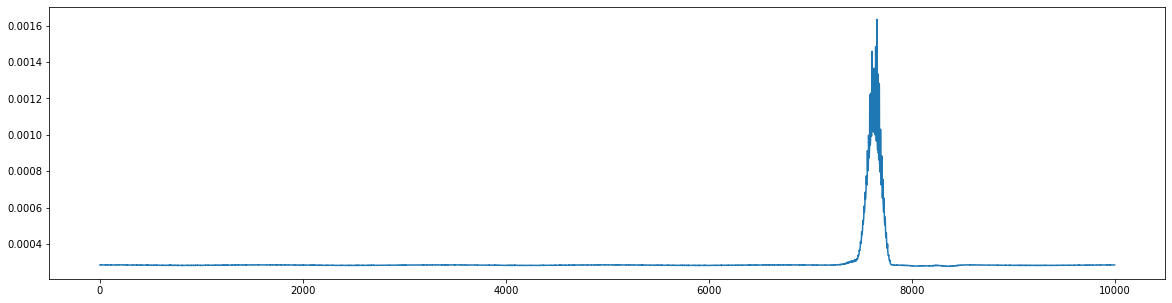

In [22]:
plt.figure(figsize=(20,5))
plt.plot(data_channel)
#plt.plot(label_channel)

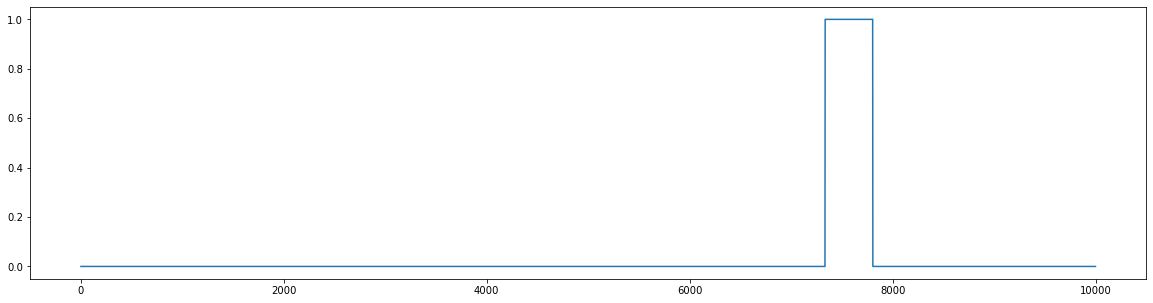

In [23]:
plt.figure(figsize=(20,5))
plt.plot(label_channel)
#plt.plot(label_channel)

In [7]:
data_channel

array([0.00028375, 0.00028375, 0.00028396, ..., 0.0002846 , 0.00028439,
       0.0002846 ])

In [8]:
meas = measurements[(measurements['TimeId'] >= 630) &  (measurements['TimeId'] <= 1626) & (measurements['DateId'] == 20211015)]

In [9]:
filename = blob.replace('/', '_').split('.')[0] + '_ds_' + str(5)

In [10]:
blob_mgr = BlobManager(configuration='rclone')
file_list = blob_mgr.download_blobs([blob], RAWDATA_CACHE_PATH, container='scouts')
data, times = load_data_from_files(file_list, RAWDATA_CACHE_PATH)
start_inds, stop_inds = get_start_and_stop(data, times)

Some files exist, not downloading again.
100% complete      [==================================================]

Reading dca6324634b1_20211014_raw_20211014T103516Z.raw.gz 1 of 1


In [11]:
feat = fp.get_features(sessionid=1307, featureid=12)
feat = feat[(feat['WavelengthId'] == '810') & (feat['SegmentId'] == 4)]
feat = feat[feat['max'] > 30]
feat['MeasurementId'] = feat['MeasurementId'].astype(int)
insects = fp.get_insects(sessionid=1307, all_segments=True)
insects = insects[insects['MeasurementId'].isin(meas['Id'])]
insects = insects['MeasurementId'].isin(feat['MeasurementId'])

In [12]:
def tight_cut(data, start_inds, stop_inds):
    start_index = None
    stop_index = None
    for j in range(start_inds, stop_inds):
        if start_index is not None:
            break
        if (int(np.max(data[j:j+100,7])) - int(data[j,7]) > 20) and start_index is None:
            start_index = j

    for j in range(stop_inds, start_inds,-1):
        if stop_index is not None:
            break
        if (int(np.max(data[j-100:j,7])) - int(data[j,7]) > 20) and stop_index is None:
            stop_index = j
    if np.fabs(stop_index - start_index) > 20000:
        return start_inds, stop_inds
    return start_index, stop_index

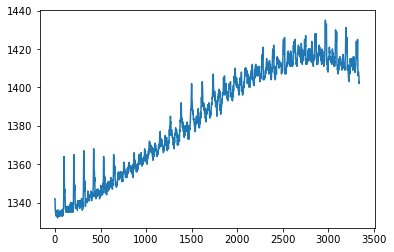

In [13]:
start_index, stop_index = tight_cut(data, start_inds[0], stop_inds[0])

plt.plot(data[start_index:stop_index,7])
plt.show()

In [14]:
start_index, stop_index = tight_cut(data, start_inds[0], stop_inds[0])

plt.plot(data_channel[start_index:stop_index,7])
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
for i, m_id in enumerate(meas['Id'].tolist()):
    ev = fp.Event(m_id).fill()
    ev.plot()
    plt.show()

In [ ]:
for i, m_id in enumerate(meas['Id'].tolist()):
    start, stop = tight_cut(data, start_inds[i], stop_inds[i])
    plt.plot(data[start:stop,7])
    plt.show()

In [ ]:
meas_id = [213082027,
           213082028,
           213082022,
           213082023,
           213082018,
           213082020,
           213082019,
           213082035]

In [ ]:
for m_id in meas_id:
    ev = fp.Event(m_id).fill()
    plt.plot(ev.data[7,:])
    plt.show()